In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import collections
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN
import math
from PIL import Image
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statistics
from sklearn import linear_model
from sklearn.preprocessing import QuantileTransformer

In [11]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [12]:
dat1=pd.read_table('MA_IN_IN.txt',sep='\t',encoding='CP932')
dat1['発表日']=pd.to_datetime(dat1['発表日'],format='%m/%d/%Y',errors='coerce')
dat1=dat1.drop([5000,9997],axis=0)
dat1=dat1.reset_index(drop=True)
dat1['発表時ﾃﾞｨｰﾙ総額(百万)']=dat1['発表時ﾃﾞｨｰﾙ総額(百万)'].astype(float)
dat1['売却側企業 12ｶ月EBITDA']=dat1['売却側企業 12ｶ月EBITDA'].astype(float)
dat1['売却側企業 12ｶ月営業利益率']=dat1['売却側企業 12ｶ月営業利益率'].astype(float)
dat1['売却側企業 12ｶ月粗利益率']=dat1['売却側企業 12ｶ月粗利益率'].astype(float)
dat1['売却側企業 過去12ｶ月売上高']=dat1['売却側企業 過去12ｶ月売上高'].astype(float)
dat1['買収側企業 12ｶ月EBITDA']=dat1['買収側企業 12ｶ月EBITDA'].astype(float)
dat1['売却側企業 12ｶ月営業利益率']=dat1['売却側企業 12ｶ月営業利益率'].astype(float)
dat1['買収側企業 12ｶ月粗利益率']=dat1['買収側企業 12ｶ月粗利益率'].astype(float)
dat1['買収側企業 過去12ｶ月売上高']=dat1['買収側企業 過去12ｶ月売上高'].astype(float)
dat1['ﾀｰｹﾞｯﾄ企業 12ｶ月EBITDA']=dat1['ﾀｰｹﾞｯﾄ企業 12ｶ月EBITDA'].astype(float)
dat1['ﾀｰｹﾞｯﾄ企業 12ｶ月営業利益率']=dat1['ﾀｰｹﾞｯﾄ企業 12ｶ月営業利益率'].astype(float)
dat1['ﾀｰｹﾞｯﾄ企業 12ｶ月粗利益率']=dat1['ﾀｰｹﾞｯﾄ企業 12ｶ月粗利益率'].astype(float)
dat1['ﾀｰｹﾞｯﾄ企業 過去12ｶ月売上高']=dat1['ﾀｰｹﾞｯﾄ企業 過去12ｶ月売上高'].astype(float)
dat1['売却側企業 従業員総数']=dat1['売却側企業 従業員総数'].astype(float)
dat1['買収側企業 従業員総数']=dat1['買収側企業 従業員総数'].astype(float)
dat1['ﾀｰｹﾞｯﾄ企業 従業員総数']=dat1['ﾀｰｹﾞｯﾄ企業 従業員総数'].astype(float)
dat1['売却側企業 付加価値']=dat1['売却側企業 付加価値'].astype(float)
dat1['買収側企業 付加価値']=dat1['買収側企業 付加価値'].astype(float)
dat1['ﾀｰｹﾞｯﾄ企業 付加価値']=dat1['ﾀｰｹﾞｯﾄ企業 付加価値'].astype(float)
dat1['売却側企業 ﾌﾞﾙｰﾑﾊﾞｰｸﾞｺﾝｾﾝｻｽ(BEst)来年度予想 1株当利益(EPS)']=dat1['売却側企業 ﾌﾞﾙｰﾑﾊﾞｰｸﾞｺﾝｾﾝｻｽ(BEst)来年度予想 1株当利益(EPS)'].astype(float)
dat1['売却側企業 ﾌﾞﾙｰﾑﾊﾞｰｸﾞｺﾝｾﾝｻｽ(BEst)本年度予想 1株当利益(EPS)']=dat1['売却側企業 ﾌﾞﾙｰﾑﾊﾞｰｸﾞｺﾝｾﾝｻｽ(BEst)本年度予想 1株当利益(EPS)'].astype(float)
dat1['買収側企業 ﾌﾞﾙｰﾑﾊﾞｰｸﾞｺﾝｾﾝｻｽ(BEst)来年度予想 1株当利益(EPS)']=dat1['買収側企業 ﾌﾞﾙｰﾑﾊﾞｰｸﾞｺﾝｾﾝｻｽ(BEst)来年度予想 1株当利益(EPS)'].astype(float)
dat1['買収側企業 ﾌﾞﾙｰﾑﾊﾞｰｸﾞｺﾝｾﾝｻｽ(BEst)本年度予想 1株当利益(EPS)']=dat1['買収側企業 ﾌﾞﾙｰﾑﾊﾞｰｸﾞｺﾝｾﾝｻｽ(BEst)本年度予想 1株当利益(EPS)'].astype(float)
dat1['ﾀｰｹﾞｯﾄ企業 ﾌﾞﾙｰﾑﾊﾞｰｸﾞｺﾝｾﾝｻｽ(BEst)来年度予想 1株当利益(EPS)']=dat1['ﾀｰｹﾞｯﾄ企業 ﾌﾞﾙｰﾑﾊﾞｰｸﾞｺﾝｾﾝｻｽ(BEst)来年度予想 1株当利益(EPS)'].astype(float)
dat1['ﾀｰｹﾞｯﾄ企業 ﾌﾞﾙｰﾑﾊﾞｰｸﾞｺﾝｾﾝｻｽ(BEst)本年度予想 1株当利益(EPS)']=dat1['ﾀｰｹﾞｯﾄ企業 ﾌﾞﾙｰﾑﾊﾞｰｸﾞｺﾝｾﾝｻｽ(BEst)本年度予想 1株当利益(EPS)'].astype(float)

In [13]:
L=dat1['買収側の社名'].tolist()
C=collections.Counter(L)
#企業名ごとの買収回数を計測
valuecol=list(C.values())
#買収回数データをリスト化
C2=collections.Counter(valuecol)
#回数ごとの企業数を計測
col1=list(C2.keys())
col2=list(C2.values())
DAT=pd.DataFrame(list(zip(col1,col2)),columns=['No. of Purchases','Firms'])
DAT['Transactions']=DAT['No. of Purchases']*DAT['Firms']
DAT['Share of Transactions']=DAT['Transactions']*int(100)/DAT['Transactions'].sum()
DAT=DAT.sort_values('No. of Purchases').reset_index(drop=True).set_index('No. of Purchases')

In [14]:
DAT.loc['1']=DAT.loc[1]
DAT.loc['2~3']=DAT.loc[2]+DAT.loc[3]
DAT.loc['4~5']=DAT.loc[4]+DAT.loc[5]
DAT.loc['6~7']=DAT.loc[6]+DAT.loc[7]
DAT.loc['8~10']=DAT.loc[8]+DAT.loc[9]+DAT.loc[10]
DAT.loc['11~15']=DAT.loc[11]+DAT.loc[12]+DAT.loc[13]+DAT.loc[14]+DAT.loc[15]
DAT.loc['16~20']=DAT.loc[16]+DAT.loc[17]+DAT.loc[18]+DAT.loc[19]+DAT.loc[20]
DAT.loc['21~30']=DAT.loc[21]+DAT.loc[22]+DAT.loc[23]+DAT.loc[24]+DAT.loc[25]+DAT.loc[26]+DAT.loc[27]+DAT.loc[28]+DAT.loc[29]+DAT.loc[30]
DAT.loc['31~40']=DAT.loc[31]+DAT.loc[32]+DAT.loc[34]+DAT.loc[35]+DAT.loc[36]+DAT.loc[38]+DAT.loc[40]
DAT.loc['41~50']=DAT.loc[41]+DAT.loc[44]+DAT.loc[45]+DAT.loc[47]+DAT.loc[50]
DAT.loc['50~']=DAT.loc[55]+DAT.loc[58]+DAT.loc[63]+DAT.loc[64]+DAT.loc[70]+DAT.loc[76]+DAT.loc[79]+DAT.loc[80]+DAT.loc[87]+DAT.loc[89]
DAT.loc['Multiple buyer']=DAT.loc[194]
DAT.loc['unnamed']=DAT.loc[638]
DAT=DAT.drop(index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,38,40,41,44,45,47,50,55,58,63,64,70,76,79,80,87,89,194,638])
DAT['Firms']=DAT['Firms'].apply(round)
DAT['Transactions']=DAT['Transactions'].apply(round)
DAT['Share of Transactions']=round(DAT['Share of Transactions'],1)
total=DAT.agg(['sum'])
DAT=pd.concat([DAT,total],axis=0)
DAT=DAT.rename(index={'sum':'Total'})
DAT.index.name='No. of Purchases'

In [15]:
def f(a):
    return(Decimal(str(a)).quantize(Decimal('0.1'), rounding=ROUND_HALF_UP))
DAT['Share of Transactions']=DAT['Share of Transactions'].apply(f)
DAT=DAT.reset_index()
DAT.to_csv('MA_scale.csv',index=False)

In [16]:
dat2=dat1.loc[:,['買収側企業 12ｶ月EBITDA','ﾀｰｹﾞｯﾄ企業 12ｶ月EBITDA']]
dat2=dat2.dropna(subset=['買収側企業 12ｶ月EBITDA','ﾀｰｹﾞｯﾄ企業 12ｶ月EBITDA'])
dat2=dat2[(dat2['買収側企業 12ｶ月EBITDA']>int(0))&(dat2['ﾀｰｹﾞｯﾄ企業 12ｶ月EBITDA']>int(0))]
dat2['Log of Acquirer EBITDA']=dat2['買収側企業 12ｶ月EBITDA'].apply(math.log)
dat2['Log of Target EBITDA']=dat2['ﾀｰｹﾞｯﾄ企業 12ｶ月EBITDA'].apply(math.log)
Target1=dat2[['Log of Target EBITDA']]
Acquirer1=dat2[['Log of Acquirer EBITDA']]

C:\Users\IchiroKozakai\AppData\Local\Temp\ipykernel_18240\3452103542.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat8['Scaled Target EBITDA']=QuantileTransformer(output_distribution='normal').fit_transform(X)
C:\Users\IchiroKozakai\AppData\Local\Temp\ipykernel_18240\3452103542.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat8['Scaled Acquirer EBITDA']=QuantileTransformer(output_distribution='normal').fit_transform(Y)


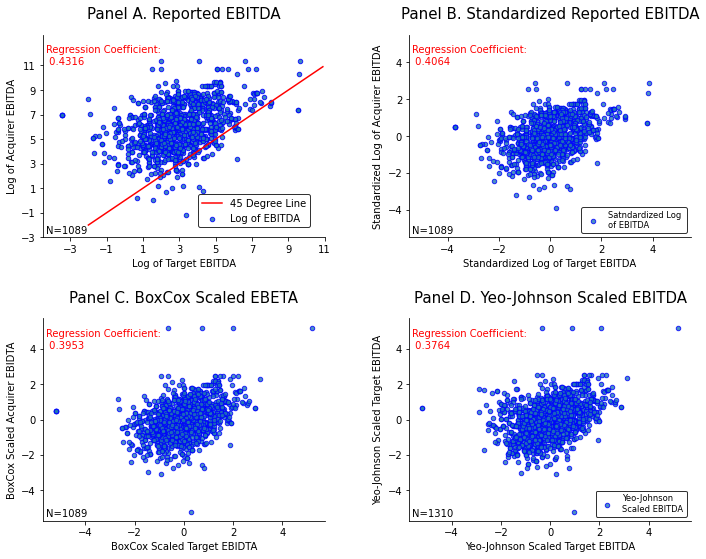

In [19]:
%matplotlib inline 
fig=plt.figure(figsize=(12.5,7.5))
fig.subplots_adjust(left=0.03, right=0.75, bottom=0.05, top=0.95, wspace=0.30, hspace=0.40)
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax3=fig.add_subplot(223)
ax4=fig.add_subplot(224)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.scatter(dat2['Log of Target EBITDA'],dat2['Log of Acquirer EBITDA'],s=20,edgecolors='blue',alpha=0.85,label='Log of EBITDA')
model=LinearRegression()
model.fit(Target1,Acquirer1)
#ax1.plot(Target1,model.predict(Target1),LineStyle='solid',color='lawngreen',label='Best Fit')
x1_1=np.arange(-2,11,0.1)
y1_1=x1_1
ax1.plot(x1_1,y1_1,color='red',label='45 Degree Line')
ax1.set_title('Panel A. Reported EBITDA',fontsize=15.0,loc='center',y=1.05)
ax1.set_xlabel('Log of Target EBITDA')
ax1.set_ylabel('Log of Acquirer EBITDA')
ax1.set_xlim(-4.5,11)
ax1.set_ylim(-3.0,13.5)
ax1.set_xticks(list(range(-3,12,2)))
ax1.set_yticks(list(range(-3,12,2)))
hans1, labs1=ax1.get_legend_handles_labels()
ax1.legend(loc=(0.55,0.05),handles=hans1[::-1],labels=labs1[::-1],edgecolor='black')
ax1.text(0.01,0.95,'Regression Coefficient:\n %.4f'%model.coef_, verticalalignment='top',transform=ax1.transAxes,color='red')
ax1.text(0.01,0.01,'N=%d'%len(dat2),verticalalignment='bottom',transform=ax1.transAxes,color='black')

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
dat2['Standardized Log of Target EBITDA']=(dat2['Log of Target EBITDA']-statistics.mean(dat2['Log of Target EBITDA']))/statistics.pstdev(dat2['Log of Target EBITDA'])
dat2['Standardized Log of Acquirer EBITDA']=(dat2['Log of Acquirer EBITDA']-statistics.mean(dat2['Log of Acquirer EBITDA']))/statistics.pstdev(dat2['Log of Acquirer EBITDA'])
ax2.scatter(dat2['Standardized Log of Target EBITDA'],dat2['Standardized Log of Acquirer EBITDA'],s=20,edgecolors='blue',alpha=0.8,label='Satndardized Log \nof EBITDA')
ax2.set_xlim(-5.5,5.5)
ax2.set_ylim(-5.5,5.5)
model=LinearRegression()
model.fit(dat2[['Standardized Log of Target EBITDA']],dat2[['Standardized Log of Acquirer EBITDA']])
#ax2.plot(dat2[['Standardized Log of Target EBITDA']],model.predict(dat2[['Standardized Log of Target EBITDA']]),LineStyle='solid',color='lawngreen',label='Best Fit')
ax2.set_title('Panel B. Standardized Reported EBITDA',fontsize=15.0,loc='center',y=1.05)
ax2.set_xlabel('Standardized Log of Target EBITDA')
ax2.set_ylabel('Standardized Log of Acquirer EBITDA')
ax2.legend(edgecolor='black',loc='lower right',fontsize='small')
ax2.text(0.01,0.95,'Regression Coefficient:\n %.4f'%model.coef_, verticalalignment='top',transform=ax2.transAxes,color='red')
ax2.text(0.01,0.01,'N=%d'%len(dat2),verticalalignment='bottom',transform=ax2.transAxes,color='black')


ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
X=dat2['買収側企業 12ｶ月EBITDA'].values.reshape(-1,1)
dat2['Scaled Acquirer EBITDA']=QuantileTransformer(output_distribution='normal').fit_transform(X)
Y=dat2['ﾀｰｹﾞｯﾄ企業 12ｶ月EBITDA'].values.reshape(-1,1)
dat2['Scaled Target EBITDA']=QuantileTransformer(output_distribution='normal').fit_transform(Y)
ax3.scatter(dat2['Scaled Target EBITDA'],dat2['Scaled Acquirer EBITDA'],s=20,edgecolors='blue',alpha=0.8)
model=LinearRegression()
model.fit(dat2[['Scaled Target EBITDA']],dat2[['Scaled Acquirer EBITDA']])
#ax3.plot(dat2[['Scaled Target EBITDA']],model.predict(dat2[['Scaled Target EBITDA']]),LineStyle='solid',color='lawngreen')
ax3.text(0.01,0.95,'Regression Coefficient:\n %.4f'%model.coef_, verticalalignment='top',transform=ax3.transAxes,color='red')
ax3.text(0.01,0.01,'N=%d'%len(dat2),verticalalignment='bottom',transform=ax3.transAxes,color='black')
ax3.set_xlabel('BoxCox Scaled Target EBIDTA')
ax3.set_ylabel('BoxCox Scaled Acquirer EBIDTA')
ax3.set_title('Panel C. BoxCox Scaled EBETA',fontsize=15.0,loc='center',y=1.05)


dat8=dat1.dropna(subset=['買収側企業 12ｶ月EBITDA','ﾀｰｹﾞｯﾄ企業 12ｶ月EBITDA'])
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
X=dat8['ﾀｰｹﾞｯﾄ企業 12ｶ月EBITDA'].values.reshape(-1,1)
dat8['Scaled Target EBITDA']=QuantileTransformer(output_distribution='normal').fit_transform(X)
Y=dat8['買収側企業 12ｶ月EBITDA'].values.reshape(-1,1)
dat8['Scaled Acquirer EBITDA']=QuantileTransformer(output_distribution='normal').fit_transform(Y)
ax4.scatter(dat8['Scaled Target EBITDA'],dat8['Scaled Acquirer EBITDA'],s=20,edgecolors='blue',alpha=0.8,label='Yeo-Johnson \nScaled EBITDA')
model=LinearRegression()
model.fit(dat8[['Scaled Target EBITDA']],dat8[['Scaled Acquirer EBITDA']])
#ax4.plot(dat8[['Scaled Target EBITDA']],model.predict(dat8[['Scaled Target EBITDA']]),LineStyle='solid',color='lawngreen',label='Best Fit')
ax4.legend(fontsize='small',loc='lower right',edgecolor='black')
ax4.set_title('Panel D. Yeo-Johnson Scaled EBITDA',fontsize=15.0,loc='center',y=1.05)
ax4.set_xlabel('Yeo-Johnson Scaled Target EBITDA')
ax4.set_ylabel('Yeo-Johnson Scaled Target EBITDA')
ax4.text(0.01,0.95,'Regression Coefficient:\n %.4f'%model.coef_, verticalalignment='top',transform=ax4.transAxes,color='red')
ax4.text(0.01,0.01,'N=%d'%len(dat8),verticalalignment='bottom',transform=ax4.transAxes,color='black')
plt.show()

In [20]:
x=dat8[['Scaled Target EBITDA']]
Y=dat8[['Scaled Acquirer EBITDA']]
X=sm.add_constant(x)
model=sm.OLS(Y,X)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Scaled Acquirer EBITDA   R-squared:                       0.138
Model:                                OLS   Adj. R-squared:                  0.137
Method:                     Least Squares   F-statistic:                     209.4
Date:                    Wed, 22 Jun 2022   Prob (F-statistic):           3.86e-44
Time:                            14:02:18   Log-Likelihood:                -1805.6
No. Observations:                    1310   AIC:                             3615.
Df Residuals:                        1308   BIC:                             3626.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0054      0.027      0.203      0.839      -0.047       0.057
Scaled Target EBITDA     0.3764      0.026     14.472      0.000       0.325       0.427
==============================================================================
Omnibus:                       73.242   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.351
Skew:                           0.191   Prob(JB):                     1.29e-51
Kurtosis:                       5.037   Cond. No.                         1.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
x=dat2[['Scaled Target EBITDA']]
Y=dat2[['Scaled Acquirer EBITDA']]
X=sm.add_constant(x)
model=sm.OLS(Y,X)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Scaled Acquirer EBITDA   R-squared:                       0.156
Model:                                OLS   Adj. R-squared:                  0.156
Method:                     Least Squares   F-statistic:                     201.5
Date:                    Wed, 22 Jun 2022   Prob (F-statistic):           4.41e-42
Time:                            14:02:22   Log-Likelihood:                -1497.9
No. Observations:                    1089   AIC:                             3000.
Df Residuals:                        1087   BIC:                             3010.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0085      0.029      0.292      0.771      -0.049       0.065
Scaled Target EBITDA     0.3953      0.028     14.195      0.000       0.341       0.450
==============================================================================
Omnibus:                       70.921   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.216
Skew:                           0.184   Prob(JB):                     1.15e-57
Kurtosis:                       5.376   Cond. No.                         1.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
len(dat2[dat2['Log of Target EBITDA']<dat2['Log of Acquirer EBITDA']])/len(dat2)
#正のデータ率

0.9449035812672176

In [23]:
len(dat8[dat8['買収側企業 12ｶ月EBITDA']>dat8['ﾀｰｹﾞｯﾄ企業 12ｶ月EBITDA']])/len(dat8)
#負のデータあり率

0.9083969465648855

Text(0.5, 1.0, 'y=-Log|x| if x<0\ny=log(x)  if x>0')

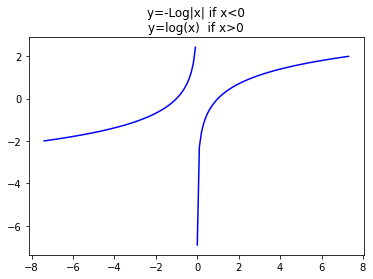

In [24]:
def L(a):
    if a>0:
        return(math.log(a))
    elif a<0:
        return(-math.log(-a))
    else: return(None)
X1=np.arange(-math.exp(2),-0.001,0.1)
X2=np.arange(0.001,math.exp(2),0.1)
Y1=[L(a) for a in X1]
Y2=[L(a) for a in X2]
%matplotlib inline 
plt.plot(X1,Y1,color='blue')
plt.plot(X2,Y2,color='blue')
plt.title('y=-Log|x| if x<0\ny=log(x)  if x>0')

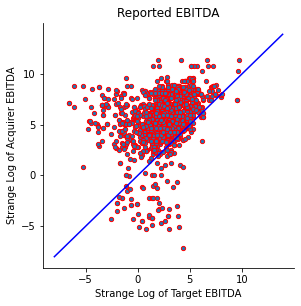

In [26]:
DAT=dat1.dropna(subset=['買収側企業 12ｶ月EBITDA','ﾀｰｹﾞｯﾄ企業 12ｶ月EBITDA'])
DAT=DAT.loc[:,['買収側企業 12ｶ月EBITDA','ﾀｰｹﾞｯﾄ企業 12ｶ月EBITDA']]
DAT['Log of Acquirer EBITDA']=DAT['買収側企業 12ｶ月EBITDA'].apply(L)
DAT['Log of Target EBITDA']=DAT['ﾀｰｹﾞｯﾄ企業 12ｶ月EBITDA'].apply(L)
%matplotlib inline 
plt.figure(figsize=(4.5,4.5))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.scatter(DAT['Log of Target EBITDA'],DAT['Log of Acquirer EBITDA'],s=18,edgecolor='red',label='Starnge Log')
X=np.arange(-8,14,0.1)
Y=X
plt.plot(X,Y,color='blue')
model=LinearRegression()
model.fit(DAT[['Log of Target EBITDA']],DAT[['Log of Acquirer EBITDA']])
#plt.plot(DAT[['Log of Target EBITDA']],model.predict(DAT[['Log of Target EBITDA']]),color='green')
plt.xlabel('Strange Log of Target EBITDA')
plt.ylabel('Strange Log of Acquirer EBITDA')
plt.title('Reported EBITDA')
plt.show()

In [27]:
dat5=pd.read_table('IN-IN_version2.txt',sep='\t',encoding='CP932')
dat5=dat5[dat5['買収側の社名']!='複数買収者']
dat5=dat5[dat5['買収側の社名']!='Potential Buyer']
dat5=dat5[dat5['買収側の社名']!='Unnamed Buyer']

In [28]:
dat6=dat5[(dat5['ﾀｰｹﾞｯﾄ企業 総負債/自己資本']>0)&(dat5['買収側企業 総負債/自己資本']>0)]
dat6['Log of Target DR']=dat6['ﾀｰｹﾞｯﾄ企業 総負債/自己資本'].apply(math.log)
dat6['Log of Acquirer DR']=dat6['買収側企業 総負債/自己資本'].apply(math.log)
Target2=dat6[['Log of Target DR']]
Acquirer2=dat6[['Log of Acquirer DR']]
dat7=dat5.dropna(subset=['ﾀｰｹﾞｯﾄ企業 総負債/自己資本','買収側企業 総負債/自己資本'])
dat7['Scaled Target DR']=(dat7['ﾀｰｹﾞｯﾄ企業 総負債/自己資本']-dat7['ﾀｰｹﾞｯﾄ企業 総負債/自己資本'].min())/(dat7['ﾀｰｹﾞｯﾄ企業 総負債/自己資本'].max()-dat7['ﾀｰｹﾞｯﾄ企業 総負債/自己資本'].min())
dat7['Scaled Acquirer DR']=(dat7['買収側企業 総負債/自己資本']-dat7['買収側企業 総負債/自己資本'].min())/(dat7['買収側企業 総負債/自己資本'].max()-dat7['買収側企業 総負債/自己資本'].min())
Target3=dat7[['Scaled Target DR']]
Acquirer3=dat7[['Scaled Acquirer DR']]

C:\Users\IchiroKozakai\AppData\Local\Temp\ipykernel_18240\751475201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat6['Log of Target DR']=dat6['ﾀｰｹﾞｯﾄ企業 総負債/自己資本'].apply(math.log)
C:\Users\IchiroKozakai\AppData\Local\Temp\ipykernel_18240\751475201.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat6['Log of Acquirer DR']=dat6['買収側企業 総負債/自己資本'].apply(math.log)
C:\Users\IchiroKozakai\AppData\Local\Temp\ipykernel_18240\751475201.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of

C:\Users\IchiroKozakai\AppData\Local\Temp\ipykernel_18240\2251292806.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat7['Scaled Target DR']=QuantileTransformer(output_distribution='normal').fit_transform(X)
C:\Users\IchiroKozakai\AppData\Local\Temp\ipykernel_18240\2251292806.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat7['Scaled Acquirer DR']=QuantileTransformer(output_distribution='normal').fit_transform(Y)
C:\Users\IchiroKozakai\AppData\Local\Temp\ipykernel_18240\2251292806.py:58: Settin

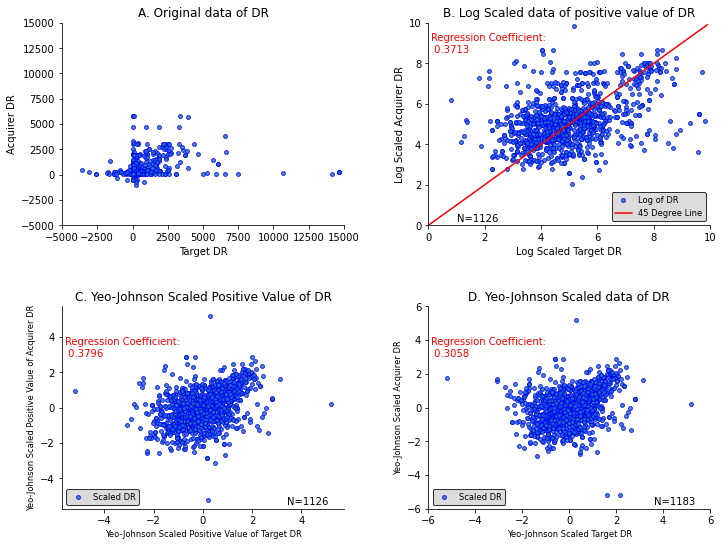

In [31]:
%matplotlib inline 
fig=plt.figure(figsize=(12.5,7.5))
fig.subplots_adjust(left=0.03, right=0.75, bottom=0.05, top=0.95, wspace=0.30, hspace=0.40)
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax3=fig.add_subplot(223)
ax4=fig.add_subplot(224)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.scatter(dat5['ﾀｰｹﾞｯﾄ企業 総負債/自己資本'],dat5['買収側企業 総負債/自己資本'],s=15,edgecolors='blue',alpha=0.8)
ax1.set_xlim(-5000,15000)
ax1.set_ylim(-5000,15000)
ax1.set_xlabel('Target DR')
ax1.set_ylabel('Acquirer DR')
ax1.set_title('A. Original data of DR')


ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.scatter(dat6['Log of Target DR'],dat6['Log of Acquirer DR'],s=15,edgecolors='blue',alpha=0.8,label='Log of DR')
x7=np.arange(0,10,0.1)
y7=x7
ax2.plot(x7,y7,color='red',label='45 Degree Line')
model=LinearRegression()
model.fit(Target2,Acquirer2)
#ax2.plot(Target2,model.predict(Target2),LineStyle='solid',color='lawngreen',label='Best Fit')
ax2.set_xlim(0,10)
ax2.set_ylim(0,10)
ax2.set_xlabel('Log Scaled Target DR')
ax2.set_ylabel('Log Scaled Acquirer DR')
ax2.legend(loc='lower right',fontsize='small',edgecolor='black',facecolor='lightgray')
ax2.set_title('B. Log Scaled data of positive value of DR')
ax2.text(0.01,0.95,'Regression Coefficient:\n %.4f'%model.coef_, verticalalignment='top',transform=ax2.transAxes,color='red')
ax2.text(0.10,0.01,'N=%d'%len(dat6),verticalalignment='bottom',transform=ax2.transAxes,color='black')

ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
X=dat7['ﾀｰｹﾞｯﾄ企業 総負債/自己資本'].values.reshape(-1,1)
dat7['Scaled Target DR']=QuantileTransformer(output_distribution='normal').fit_transform(X)
Y=dat7['買収側企業 総負債/自己資本'].values.reshape(-1,1)
dat7['Scaled Acquirer DR']=QuantileTransformer(output_distribution='normal').fit_transform(Y)
ax4.scatter(dat7['Scaled Target DR'],dat7['Scaled Acquirer DR'],s=15,edgecolors='blue',alpha=0.8,label='Scaled DR')
model=LinearRegression()
model.fit(dat7[['Scaled Target DR']],dat7[['Scaled Acquirer DR']])
#ax4.plot(dat7[['Scaled Target DR']],model.predict(dat7[['Scaled Target DR']]),LineStyle='solid',color='lawngreen',label='Best Fit')
ax4.set_xlim(-6,6)
ax4.set_ylim(-6,6)
ax4.set_xlabel('Yeo-Johnson Scaled Target DR',fontsize='small')
ax4.set_ylabel('Yeo-Johnson Scaled Acquirer DR',fontsize='small')
ax4.legend(loc='lower left',fontsize='small',edgecolor='black',facecolor='lightgray')
ax4.set_title('D. Yeo-Johnson Scaled data of DR')
ax4.text(0.01,0.85,'Regression Coefficient:\n %.4f'%model.coef_, verticalalignment='top',transform=ax4.transAxes,color='red')
ax4.text(0.80,0.01,'N=%d'%len(dat7),verticalalignment='bottom',transform=ax4.transAxes,color='black')

ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
X=dat6['ﾀｰｹﾞｯﾄ企業 総負債/自己資本'].values.reshape(-1,1)
dat6['Scaled Target DR']=QuantileTransformer(output_distribution='normal').fit_transform(X)
Y=dat6['買収側企業 総負債/自己資本'].values.reshape(-1,1)
dat6['Scaled Acquirer DR']=QuantileTransformer(output_distribution='normal').fit_transform(Y)
ax3.scatter(dat6['Scaled Target DR'],dat6['Scaled Acquirer DR'],s=15,edgecolors='blue',alpha=0.8,label='Scaled DR')
model=LinearRegression()
model.fit(dat6[['Scaled Target DR']],dat6[['Scaled Acquirer DR']])
#ax3.plot(dat6[['Scaled Target DR']],model.predict(dat6[['Scaled Target DR']]),LineStyle='solid',color='lawngreen',label='Best Fit')
ax3.text(0.01,0.85,'Regression Coefficient:\n %.4f'%model.coef_, verticalalignment='top',transform=ax3.transAxes,color='red')
ax3.legend(loc='lower left',fontsize='small',edgecolor='black',facecolor='lightgray')
ax3.text(0.80,0.01,'N=%d'%len(dat6),verticalalignment='bottom',transform=ax3.transAxes,color='black')
ax3.set_xlabel('Yeo-Johnson Scaled Positive Value of Target DR',fontsize='small')
ax3.set_ylabel('Yeo-Johnson Scaled Positive Value of Acquirer DR',fontsize='small')
ax3.set_title('C. Yeo-Johnson Scaled Positive Value of DR')
plt.show()

In [32]:
len(dat6[dat6['Log of Target DR']<dat6['Log of Acquirer DR']])/len(dat6)

0.5648312611012434

In [33]:
len(dat7[dat7['ﾀｰｹﾞｯﾄ企業 総負債/自己資本']<dat7['買収側企業 総負債/自己資本']])/len(dat7)

0.5739644970414202

In [34]:
x=dat6[['Scaled Target DR']]
Y=dat6[['Scaled Acquirer DR']]
X=sm.add_constant(x)
model=sm.OLS(Y,X)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Scaled Acquirer DR   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     189.3
Date:                Wed, 22 Jun 2022   Prob (F-statistic):           6.36e-40
Time:                        14:04:27   Log-Likelihood:                -1529.6
No. Observations:                1126   AIC:                             3063.
Df Residuals:                    1124   BIC:                             3073.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.912e-05      0.028      0.002      0.999      -0.055       0.055
Scaled Target DR     0.3796      0.028     13.759      0.000       0.325       0.434
==============================================================================
Omnibus:                       46.524   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.566
Skew:                          -0.082   Prob(JB):                     1.64e-29
Kurtosis:                       4.673   Cond. No.                         1.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
x=dat7[['Scaled Target DR']]
Y=dat7[['Scaled Acquirer DR']]
X=sm.add_constant(x)
model=sm.OLS(Y,X)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Scaled Acquirer DR   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     120.1
Date:                Wed, 22 Jun 2022   Prob (F-statistic):           1.09e-26
Time:                        14:04:30   Log-Likelihood:                -1648.2
No. Observations:                1183   AIC:                             3300.
Df Residuals:                    1181   BIC:                             3311.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0018      0.028     -0.062      0.950      -0.057       0.054
Scaled Target DR     0.3058      0.028     10.960      0.000       0.251       0.361
==============================================================================
Omnibus:                       80.241   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              288.138
Skew:                          -0.229   Prob(JB):                     2.70e-63
Kurtosis:                       5.374   Cond. No.                         1.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
dat8=dat5.dropna(subset=['ﾀｰｹﾞｯﾄ企業 現金比率','買収側企業 現金比率'])
dat8['Log of Target Cash Rate']=dat8['ﾀｰｹﾞｯﾄ企業 現金比率'].apply(math.log)
dat8['Log of Avquirer Cash Rate']=dat8['買収側企業 現金比率'].apply(math.log)
Target4=dat8[['Log of Target Cash Rate']]
Acquirer4=dat8[['Log of Avquirer Cash Rate']]

C:\Users\IchiroKozakai\AppData\Local\Temp\ipykernel_18240\22476030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat8['Log of Target Cash Rate']=dat8['ﾀｰｹﾞｯﾄ企業 現金比率'].apply(math.log)
C:\Users\IchiroKozakai\AppData\Local\Temp\ipykernel_18240\22476030.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat8['Log of Avquirer Cash Rate']=dat8['買収側企業 現金比率'].apply(math.log)


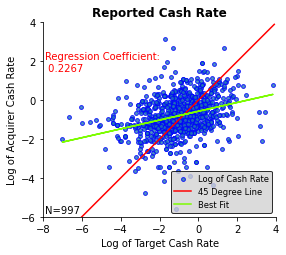

In [37]:
%matplotlib inline 
fig=plt.figure(figsize=(4.5,3.0))
fig.subplots_adjust(left=0.03, right=0.75, bottom=0.05, top=0.95, wspace=0.30, hspace=0.05)
ax1=fig.add_subplot(111)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.scatter(dat8['Log of Target Cash Rate'],dat8['Log of Avquirer Cash Rate'],s=15,edgecolors='blue',alpha=0.8,label='Log of Cash Rate')
x10=np.arange(-8,4,0.1)
y10=x10
ax1.plot(x10,y10,color='red',label='45 Degree Line')
X=dat8[['Log of Target Cash Rate']].values
Y=dat8[['Log of Avquirer Cash Rate']].values
model=LinearRegression()
model.fit(X,Y)
ax1.plot(X,model.predict(X),color='lawngreen',label='Best Fit')
ax1.set_xlabel('Log of Target Cash Rate')
ax1.set_ylabel('Log of Acquirer Cash Rate')
ax1.legend(loc='lower right',fontsize='small',facecolor='lightgray',edgecolor='black')
ax1.set_title('Reported Cash Rate',weight='bold')
ax1.set_xlim(-8,4)
ax1.set_ylim(-6,4)
ax1.text(0.01,0.01,'N=%d'%len(dat8),verticalalignment='bottom',transform=ax1.transAxes,color='black')
ax1.text(0.01,0.85,'Regression Coefficient:\n %.4f'%model.coef_, verticalalignment='top',transform=ax1.transAxes,color='red')
plt.show()

In [38]:
len(dat8[dat8[ 'Log of Target Cash Rate']<dat8['Log of Avquirer Cash Rate']])/len(dat8)

0.5476429287863591

In [39]:
x=dat8[['Log of Target Cash Rate']]
Y=dat8[['Log of Avquirer Cash Rate']]
X=sm.add_constant(x)
model=sm.OLS(Y,X)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Log of Avquirer Cash Rate   R-squared:                       0.102
Model:                                   OLS   Adj. R-squared:                  0.101
Method:                        Least Squares   F-statistic:                     113.1
Date:                       Wed, 22 Jun 2022   Prob (F-statistic):           4.32e-25
Time:                               14:05:05   Log-Likelihood:                -1325.5
No. Observations:                        997   AIC:                             2655.
Df Residuals:                            995   BIC:                             2665.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.5708      0.036    -15.824      0.000      -0.642      -0.500
Log of Target Cash Rate     0.2267      0.021     10.635      0.000       0.185       0.269
==============================================================================
Omnibus:                       63.475   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.387
Skew:                          -0.236   Prob(JB):                     2.52e-45
Kurtosis:                       5.173   Cond. No.                         2.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
dat9=dat5.loc[:,['買収側企業 財務ﾚﾊﾞﾚｯｼﾞ','ﾀｰｹﾞｯﾄ企業 財務ﾚﾊﾞﾚｯｼﾞ']]
dat9=dat9.dropna()
dat9['Log of Acquirer Financial Leverage']=dat9['買収側企業 財務ﾚﾊﾞﾚｯｼﾞ'].apply(math.log)
dat9['Log of Target Financial Leverage']=dat9['ﾀｰｹﾞｯﾄ企業 財務ﾚﾊﾞﾚｯｼﾞ'].apply(math.log)
Y=dat9['買収側企業 財務ﾚﾊﾞﾚｯｼﾞ'].values.reshape(-1,1)
dat9['Scaled Acquirer FL']=QuantileTransformer(output_distribution='normal').fit_transform(Y)
X=dat9['ﾀｰｹﾞｯﾄ企業 財務ﾚﾊﾞﾚｯｼﾞ'].values.reshape(-1,1)
dat9['Scaled Target FL']=QuantileTransformer(output_distribution='normal').fit_transform(X)

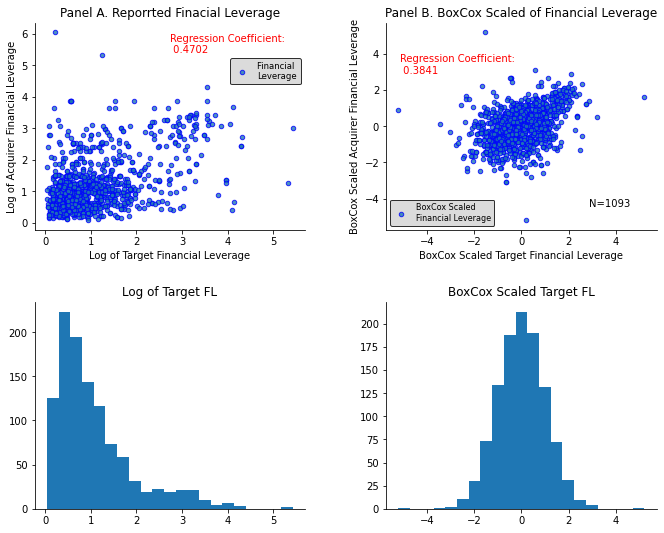

In [42]:
%matplotlib inline 
fig=plt.figure(figsize=(12.0,7.5))
fig.subplots_adjust(left=0.03, right=0.75, bottom=0.05, top=0.95, wspace=0.30, hspace=0.35)
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax3=fig.add_subplot(223)
ax4=fig.add_subplot(224)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.scatter(dat9['Log of Target Financial Leverage'],dat9['Log of Acquirer Financial Leverage'],s=20,edgecolors='blue',alpha=0.8,label='Financial \nLeverage')
model=LinearRegression()
model.fit(dat9[['Log of Target Financial Leverage']],dat9[['Log of Acquirer Financial Leverage']])
#ax1.plot(dat9[['Log of Target Financial Leverage']],model.predict(dat9[['Log of Target Financial Leverage']]),LineStyle='solid',color='lawngreen',label='Best Fit')
ax1.text(0.50,0.95,'Regression Coefficient:\n %.4f'%model.coef_, verticalalignment='top',transform=ax1.transAxes,color='red')
ax1.set_xlabel('Log of Target Financial Leverage')
ax1.set_ylabel('Log of Acquirer Financial Leverage')
ax1.set_title('Panel A. Reporrted Finacial Leverage')
ax1.legend(fontsize=8.5,loc='upper right',bbox_to_anchor=(1.0,0.85),edgecolor='black',facecolor='lightgray')

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.scatter(dat9['Scaled Target FL'],dat9['Scaled Acquirer FL'],s=20,edgecolors='blue',alpha=0.8,label='BoxCox Scaled \nFinancial Leverage')
model=LinearRegression()
model.fit(dat9[['Scaled Target FL']],dat9[['Scaled Acquirer FL']])
#ax2.plot(dat9[['Scaled Target FL']],model.predict(dat9[['Scaled Target FL']]),LineStyle='solid',color='lawngreen',label='Best Fit')
ax2.text(0.05,0.85,'Regression Coefficient:\n %.4f'%model.coef_, verticalalignment='top',transform=ax2.transAxes,color='red')
ax2.legend(loc='lower left',fontsize=8.0,edgecolor='black',facecolor='lightgray')
ax2.set_title('Panel B. BoxCox Scaled of Financial Leverage')
ax2.set_xlabel('BoxCox Scaled Target Financial Leverage')
ax2.set_ylabel('BoxCox Scaled Acquirer Financial Leverage')
ax2.text(0.75,0.10,'N=%d'%len(dat9),verticalalignment='bottom',transform=ax2.transAxes,color='black')


ax3.hist(dat9['Log of Target Financial Leverage'],bins=21)
ax3.set_title('Log of Target FL')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax4.hist(dat9['Scaled Target FL'],bins=21)
ax4.set_title('BoxCox Scaled Target FL')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
plt.show()

In [43]:
len(dat9[dat9['Log of Target Financial Leverage']<dat9['Log of Acquirer Financial Leverage']])/len(dat9)

0.5800548947849954

In [44]:
x=dat9[['Scaled Target FL']]
Y=dat9[['Scaled Acquirer FL']]
X=sm.add_constant(x)
model=sm.OLS(Y,X)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Scaled Acquirer FL   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     189.2
Date:                Wed, 22 Jun 2022   Prob (F-statistic):           8.00e-40
Time:                        14:05:38   Log-Likelihood:                -1483.4
No. Observations:                1093   AIC:                             2971.
Df Residuals:                    1091   BIC:                             2981.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0001      0.028     -0.004      0.997      -0.056       0.056
Scaled Target FL     0.3841      0.028     13.756      0.000       0.329       0.439
==============================================================================
Omnibus:                       58.545   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.546
Skew:                          -0.036   Prob(JB):                     3.14e-46
Kurtosis:                       5.144   Cond. No.                         1.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
dat5['発表ﾌﾟﾚﾐｱﾑ'].describe()

count    1617.000000
mean       19.537050
std        33.065884
min       -84.560000
25%         1.010000
50%        13.140000
75%        32.210000
max       376.220000
Name: 発表ﾌﾟﾚﾐｱﾑ, dtype: float64

In [46]:
dat1['発表日']=dat1['発表日'].astype(str)
dat=pd.read_csv('MA-JAPAN.csv')
DATA_MA_JAPAN=pd.merge(dat1,dat,how='inner',on=['発表日','ﾀｰｹﾞｯﾄ会社名','買収側の社名','発表時ﾃﾞｨｰﾙ総額(百万)'])

In [47]:
DATA_MA_JAPAN['発表時ﾃﾞｨｰﾙ総額(百万)'].describe()

count    10929.000000
mean       129.897366
std        957.987795
min          1.000000
25%          4.890000
50%         15.160000
75%         55.640000
max      44815.050000
Name: 発表時ﾃﾞｨｰﾙ総額(百万), dtype: float64

In [48]:
dat10=DATA_MA_JAPAN.dropna(subset=['買収側企業 12ｶ月営業利益率','買収側企業 12ｶ月粗利益率','買収側企業 過去12ｶ月売上高', '買収側企業 従業員総数','ﾀｰｹﾞｯﾄ企業 12ｶ月営業利益率','ﾀｰｹﾞｯﾄ企業 12ｶ月粗利益率','ﾀｰｹﾞｯﾄ企業 過去12ｶ月売上高','ﾀｰｹﾞｯﾄ企業 従業員総数']).loc[:,['買収側企業 12ｶ月営業利益率','買収側企業 12ｶ月粗利益率','買収側企業 過去12ｶ月売上高', '買収側企業 従業員総数','ﾀｰｹﾞｯﾄ企業 12ｶ月営業利益率', 'ﾀｰｹﾞｯﾄ企業 12ｶ月粗利益率', 'ﾀｰｹﾞｯﾄ企業 過去12ｶ月売上高','ﾀｰｹﾞｯﾄ企業 従業員総数']]
dat10['買収側企業 12ｶ月営業利益率']=dat10['買収側企業 12ｶ月営業利益率'].astype(float)
dat10[ '買収側企業 従業員総数']=dat10[ '買収側企業 従業員総数'].astype(int)
dat10['ﾀｰｹﾞｯﾄ企業 従業員総数']=dat10['ﾀｰｹﾞｯﾄ企業 従業員総数'].astype(int)

C:\Users\IchiroKozakai\AppData\Local\Temp\ipykernel_18240\3184177374.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat11['Log of Target SG&A ratio']=dat11['Target SG&A ratio'].apply(math.log)
C:\Users\IchiroKozakai\AppData\Local\Temp\ipykernel_18240\3184177374.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat11['Log of Acquirer SG&A ratio']=dat11['Acquirer SG&A ratio'].apply(math.log)


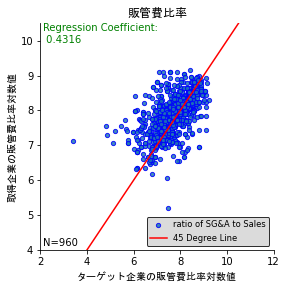

In [51]:
dat10['Acquirer SG&A ratio']=(-dat10['買収側企業 12ｶ月営業利益率']/100+dat10['買収側企業 12ｶ月粗利益率'])*(100)
dat10['Target SG&A ratio']=(-dat10['ﾀｰｹﾞｯﾄ企業 12ｶ月営業利益率']/100+dat10['ﾀｰｹﾞｯﾄ企業 12ｶ月粗利益率'])*(100)
dat11=dat10[(dat10['Acquirer SG&A ratio']>0)&(dat10['Target SG&A ratio']>0)]
dat11['Log of Target SG&A ratio']=dat11['Target SG&A ratio'].apply(math.log)
dat11['Log of Acquirer SG&A ratio']=dat11['Acquirer SG&A ratio'].apply(math.log)
%matplotlib inline 
fig=plt.figure(figsize=(4.5,3.5))
fig.subplots_adjust(left=0.03, right=0.75, bottom=0.05, top=0.95, wspace=0.30, hspace=0.35)
ax1=fig.add_subplot(111)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xlim(2,12)
ax1.set_ylim(4,10.5)
ax1.scatter(dat11['Log of Target SG&A ratio'],dat11['Log of Acquirer SG&A ratio'],s=18,edgecolors='blue',alpha=0.85,label='ratio of SG&A to Sales')
ax1.set_xlabel('ターゲット企業の販管費比率対数値',fontname='MS Gothic')
ax1.set_ylabel('取得企業の販管費比率対数値',fontname='MS Gothic')
x=np.arange(0,12,0.1)
y=x
ax1.plot(x,y,color='red',label='45 Degree Line')
model=LinearRegression()
model.fit(dat11[['Log of Target SG&A ratio']],dat11[['Log of Acquirer SG&A ratio']])
#ax1.plot(dat11[['Log of Target SG&A ratio']],model.predict(dat11[['Log of Target SG&A ratio']]),LineStyle='solid',color='lawngreen',label='Best Fit')
ax1.text(0.01,0.01,'N=%d'%len(dat11),verticalalignment='bottom',transform=ax1.transAxes,color='black')
ax1.text(0.01,1.00,'Regression Coefficient:\n %.4f'%model.coef_, verticalalignment='top',transform=ax1.transAxes,color='green')
ax1.set_title('販管費比率',weight='bold',fontsize='large',fontname='MS Gothic')
ax1.legend(loc='lower right',edgecolor='black',fontsize='small',facecolor='lightgray')
plt.show()

In [52]:
len(dat11[dat11['Log of Target SG&A ratio']>dat11['Log of Acquirer SG&A ratio']])/len(dat11)


0.34479166666666666

In [53]:
x=dat11[['Log of Target SG&A ratio']]
Y=dat11[['Log of Acquirer SG&A ratio']]
X=sm.add_constant(x)
model=sm.OLS(Y,X)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Log of Acquirer SG&A ratio   R-squared:                       0.303
Model:                                    OLS   Adj. R-squared:                  0.302
Method:                         Least Squares   F-statistic:                     416.7
Date:                        Wed, 22 Jun 2022   Prob (F-statistic):           3.47e-77
Time:                                14:06:20   Log-Likelihood:                -608.92
No. Observations:                         960   AIC:                             1222.
Df Residuals:                             958   BIC:                             1232.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        4.5503      0.162     28.029      0.000       4.232       4.869
Log of Target SG&A ratio     0.4316      0.021     20.414      0.000       0.390       0.473
==============================================================================
Omnibus:                       49.531   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.339
Skew:                          -0.229   Prob(JB):                     3.02e-29
Kurtosis:                       4.753   Cond. No.                         86.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
dat12=pd.read_csv('MA_US.csv')
dat13=dat12.dropna(subset=['買収側企業 EBITDA','ﾀｰｹﾞｯﾄ企業 EBITDA'])
dat13=dat13.loc[:,['買収側企業 EBITDA','ﾀｰｹﾞｯﾄ企業 EBITDA']]
dat13=dat13[(dat13['買収側企業 EBITDA']>0)&(dat13['ﾀｰｹﾞｯﾄ企業 EBITDA']>0)]
dat13['Log of Acquirer EBIDTA']=dat13['買収側企業 EBITDA'].apply(math.log)
dat13['Log of Target EBIDTA']=dat13['ﾀｰｹﾞｯﾄ企業 EBITDA'].apply(math.log)

C:\Users\IchiroKozakai\AppData\Local\Temp\ipykernel_18240\2009428258.py:1: DtypeWarning: Columns (27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  dat12=pd.read_csv('MA_US.csv')


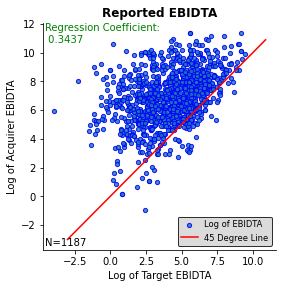

In [56]:
%matplotlib inline 
fig=plt.figure(figsize=(4.5,3.5))
fig.subplots_adjust(left=0.03, right=0.75, bottom=0.05, top=0.95, wspace=0.30, hspace=0.35)
ax1=fig.add_subplot(111)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.scatter(dat13['Log of Target EBIDTA'],dat13['Log of Acquirer EBIDTA'],s=18,edgecolors='blue',alpha=0.85,label='Log of EBIDTA')
ax1.set_xlabel('Log of Target EBIDTA')
ax1.set_ylabel('Log of Acquirer EBIDTA')
x=np.arange(-3,11.0,0.1)
y=x
ax1.plot(x,y,color='red',label='45 Degree Line')
model=LinearRegression()
model.fit(dat13[['Log of Target EBIDTA']],dat13[['Log of Acquirer EBIDTA']])
#ax1.plot(dat13[['Log of Target EBIDTA']],model.predict(dat13[['Log of Target EBIDTA']]),LineStyle='solid',color='lawngreen',label='Best Fit')
ax1.text(0.01,0.01,'N=%d'%len(dat13),verticalalignment='bottom',transform=ax1.transAxes,color='black')
ax1.text(0.01,1.00,'Regression Coefficient:\n %.4f'%model.coef_, verticalalignment='top',transform=ax1.transAxes,color='green')
ax1.set_title('Reported EBIDTA',weight='bold',fontsize='large')
ax1.legend(loc='lower right',edgecolor='black',fontsize='small',facecolor='lightgray')
plt.show()

In [57]:
x=dat13[['Log of Target EBIDTA']]
Y=dat13[['Log of Acquirer EBIDTA']]
X=sm.add_constant(x)
model=sm.OLS(Y,X)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Log of Acquirer EBIDTA   R-squared:                       0.157
Model:                                OLS   Adj. R-squared:                  0.156
Method:                     Least Squares   F-statistic:                     220.6
Date:                    Wed, 22 Jun 2022   Prob (F-statistic):           6.72e-46
Time:                            14:06:40   Log-Likelihood:                -2271.3
No. Observations:                    1187   AIC:                             4547.
Df Residuals:                        1185   BIC:                             4557.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.4844      0.108     50.552      0.000       5.272       5.697
Log of Target EBIDTA     0.3437      0.023     14.854      0.000       0.298       0.389
==============================================================================
Omnibus:                       27.390   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.424
Skew:                          -0.251   Prob(JB):                     7.47e-09
Kurtosis:                       3.710   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
dat14=dat12.loc[:,['買収側企業 流動負債/総資本', 'ﾀｰｹﾞｯﾄ企業 流動負債/総資本']].dropna(subset=['買収側企業 流動負債/総資本', 'ﾀｰｹﾞｯﾄ企業 流動負債/総資本'])
dat14=dat14[(dat14['買収側企業 流動負債/総資本']>0)&(dat14['ﾀｰｹﾞｯﾄ企業 流動負債/総資本']>0)]
dat14['Log of Target DR']=dat14['ﾀｰｹﾞｯﾄ企業 流動負債/総資本'].apply(math.log)
dat14['Log of Acquirer DR']=dat14['買収側企業 流動負債/総資本'].apply(math.log)

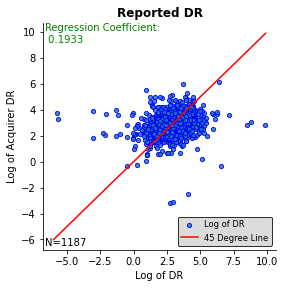

In [59]:
%matplotlib inline 
fig=plt.figure(figsize=(4.5,3.5))
fig.subplots_adjust(left=0.03, right=0.75, bottom=0.05, top=0.95, wspace=0.30, hspace=0.35)
ax1=fig.add_subplot(111)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.scatter(dat14['Log of Target DR'],dat14['Log of Acquirer DR'],s=18,edgecolors='blue',alpha=0.85,label='Log of DR')
ax1.set_xlabel('Log of DR')
ax1.set_ylabel('Log of Acquirer DR')
x=np.arange(-6,10.0,0.1)
y=x
ax1.plot(x,y,color='red',label='45 Degree Line')
model=LinearRegression()
model.fit(dat14[['Log of Target DR']],dat14[['Log of Acquirer DR']])
#ax1.plot(dat14[['Log of Target DR']],model.predict(dat14[['Log of Target DR']]),LineStyle='solid',color='lawngreen',label='Best Fit')
ax1.text(0.01,0.01,'N=%d'%len(dat13),verticalalignment='bottom',transform=ax1.transAxes,color='black')
ax1.text(0.01,1.00,'Regression Coefficient:\n %.4f'%model.coef_, verticalalignment='top',transform=ax1.transAxes,color='green')
ax1.set_title('Reported DR',weight='bold',fontsize='large')
ax1.legend(loc='lower right',edgecolor='black',fontsize='small',facecolor='lightgray')
plt.show()

In [60]:
dat1['発表日'].max()

'2021-10-04'

In [61]:
dat1['発表日'].min()

'1993-03-19'